# Graph Lab

## Header information:

  - Author #1: Adam Podolak (podola2@mcmaster.ca)
  - Author #2: Justin Ho (hoj66@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/podola2/l1-graph-lab
  - Avenue to Learn group name: Group 58

#### Importing The Graph


In [1]:
#Loading the graph from the CSV files
import sys
sys.path.insert(0, 'code/GraphBuilder')
sys.path.insert 
from GraphBuilder import *
from GraphFactory import *

def import_graph():
    return BuildEdgeGraph.build()
    

#### Computing the Metrics

In [2]:
#Computing the Metrics
import sys
sys.path.insert(0, 'code/MetricsExtractor')
from Selector import Selector
from MetricsExtractors import *

graph = import_graph()

selector = Selector()

def get_num_nodes(graph):
    selector.set_metrics_extractor(GetNumberOfNodes())
    num_nodes = selector.execute(graph)
    return num_nodes


def get_num_edges(graph):
    selector.set_metrics_extractor(GetNumberOfEdges())
    num_edges = selector.execute(graph)
    return num_edges

def get_average_degree(graph):
    selector.set_metrics_extractor(GetAverageDegreeNodes())
    avg_dg_nodes = selector.execute(graph)
    return avg_dg_nodes


def get_degree_distribution(graph):
    selector.set_metrics_extractor(GetDegreeDistribution())
    node_degree_distribution = selector.execute(graph)
    return node_degree_distribution

def get_degree_node(graph, stationNumber):
    dg_dist = get_degree_distribution(graph)
    node_dg = dg_dist[stationNumber - 1]
    return node_dg

def main():
    print("Number of nodes in graph: " + str(get_num_nodes(graph)))
    print("Number of edges in graph: " + str(get_num_edges(graph)))
    print("Average degree of the nodes: " + str(get_average_degree(graph)))
    print("Degree distribution (modelled as an array \nwhere the stations are represented by the indices and the value at a specific index is the degree of the station/node): \n" + str(get_degree_distribution(graph)))
    print("\nRetrieving different node degrees: \nDegree of station 11: " + str(get_degree_node(graph, 11)))
    print("Degree of station 21: " + str(get_degree_node(graph, 21)))
    print("Degree of station 14: " + str(get_degree_node(graph, 14)))
    print("Degree of station 247: " + str(get_degree_node(graph, 247)))

main()

Number of nodes in graph: 303
Number of edges in graph: 406
Average degree of the nodes: 2
Degree distribution (modelled as an array 
where the stations are represented by the indices and the value at a specific index is the degree of the station/node): 
[5, 3, 4, 2, 2, 1, 2, 2, 2, 2, 10, 2, 6, 6, 3, 2, 4, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 1, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 7, 4, 2, 2, 4, 2, 2, 1, 2, 5, 3, 2, 2, 8, 1, 6, 6, 2, 6, 3, 4, 4, 2, 2, 2, 6, 2, 2, 2, 2, 6, 2, 2, 6, 2, 2, 5, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 1, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 12, 2, 2, 2, 2, 2, 4, 1, 2, 3, 2, 8, 4, 2, 2, 2, 4, 2, 2, 6, 1, 4, 8, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 6, 2, 2, 2, 2, 6, 8, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 5, 2, 2, 1, 4, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 1, 4, 4, 2, 4, 4, 2

#### Plotting Degree Distributions

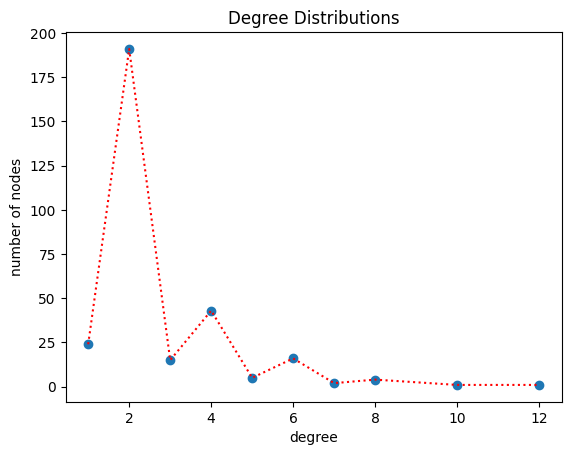

In [3]:
#Graphing the Degree Distributions 
import matplotlib.pyplot as plt

graph = import_graph()

def getX(graph): #x axis is the degrees
    deg_dist = get_degree_distribution(graph)
    deg_dist.sort()
    deg_dist = list(dict.fromkeys(deg_dist))
    return deg_dist

def getY(graph): #y axis is number of nodes with such degree
    deg_dist = get_degree_distribution(graph)
    degrees = getX(graph)
    
    num_nodes = []
    
    for d in degrees:
        num_nodes.append(0)
    
    
    for i in range(0, len(degrees)):
        count = 0
        for j in range(0, len(deg_dist)):
            if deg_dist[j] == degrees[i]:
                count += 1
                num_nodes[i] = count
        count = 0
    
    return num_nodes

plt.plot(getX(graph), getY(graph), 'o')
plt.plot(getX(graph), getY(graph), 'r:')
plt.title("Degree Distributions")
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()

#### Benchmarks

We decided to test our pathfinding algorithms wit respect to 3 KPIs:
+ Number of nodes visited
+ Number of edges visited
+ Travel time



##### Setting up the benchmarks

In [4]:
import sys
import numpy as np
from Benchmark import *


graph = BuildEdgeGraph.build()
dijkstras = create_dijkstras()
astar = create_astar()
dataset = build_dataset(30)

#Number of nodes visited: KPI 1
nodes_visited_dijkstras = multi_pathfind(dijkstras, graph, dataset, "nodes")
nodes_visited_astar = multi_pathfind(astar, graph, dataset, "nodes")

#number of edges visited: KPI 2
edges_visited_dijkstras = multi_pathfind(dijkstras, graph, dataset, "edges")
edges_visited_astar = multi_pathfind(astar, graph, dataset, "edges")

#travel time (edge weights): KPI 3
travel_time_dijkstras = multi_pathfind(
    dijkstras, graph, dataset, "travel time")
travel_time_astar = multi_pathfind(astar, graph, dataset, "travel time")

#formatting the results
def format(dataset):
    print("{")
    for key in dataset:
        print(key, ": ", dataset[key])
    print("}")

print("Data set being used: a dictionary of random station numbers (nodes), [s1, s2]")
print("The keys of the dataset represent the path (ex: path 1, path 2) and the value at that key are the 2 stations/nodes being passed in")
print("\ndataset = ")
format(dataset)

Data set being used: a dictionary of random station numbers (nodes), [s1, s2]
The keys of the dataset represent the path (ex: path 1, path 2) and the value at that key are the 2 stations/nodes being passed in

dataset = 
{
0 :  [257, 117]
1 :  [250, 247]
2 :  [181, 104]
3 :  [15, 125]
4 :  [155, 204]
5 :  [43, 79]
6 :  [94, 66]
7 :  [81, 276]
8 :  [61, 209]
9 :  [60, 24]
10 :  [124, 210]
11 :  [182, 302]
12 :  [19, 247]
13 :  [13, 242]
14 :  [24, 103]
15 :  [224, 28]
16 :  [286, 112]
17 :  [73, 12]
18 :  [201, 269]
19 :  [142, 202]
20 :  [275, 176]
21 :  [158, 298]
22 :  [269, 27]
23 :  [228, 224]
24 :  [168, 138]
25 :  [76, 88]
26 :  [68, 216]
27 :  [204, 19]
28 :  [196, 109]
29 :  [133, 86]
}


#### Plotting Dijkstra's vs. A* for Number of Nodes Visited

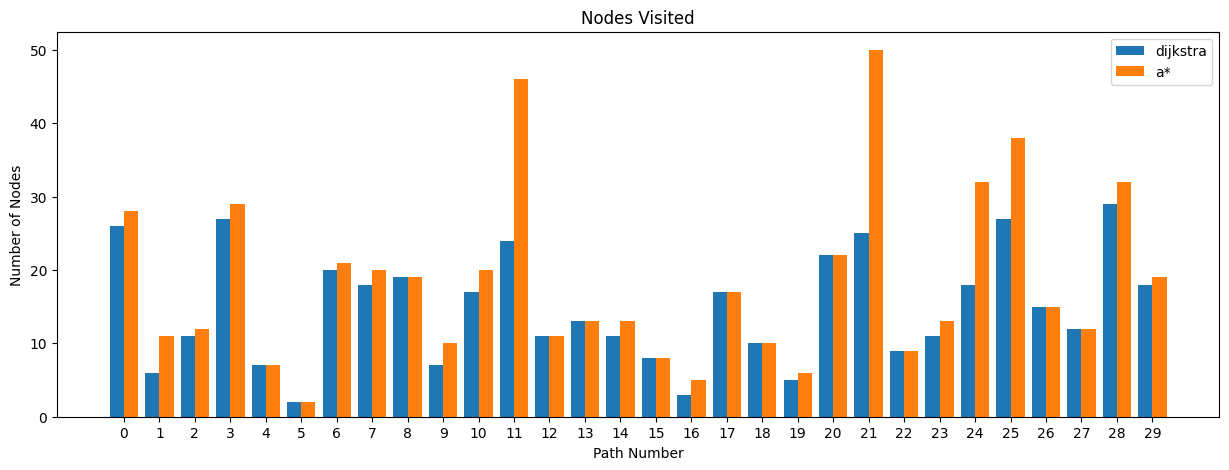

In [5]:
#plotting the data
x = [dataset[key] for key in dataset]
x = np.arange(len(x))


#Comparing number of nodes visited
y_dijkstras = [nodes_visited_dijkstras[key] for key in nodes_visited_dijkstras]
y_astar = [nodes_visited_astar[key] for key in nodes_visited_astar]
plt.rcParams["figure.figsize"] = [15, 5]
plt.bar(x - 0.2, y_dijkstras, 0.4, label = 'dijkstra')
plt.bar(x + 0.2, y_astar, 0.4, label = 'a*')
plt.xticks(x)
plt.title("Nodes Visited")
plt.xlabel('Path Number')
plt.ylabel('Number of Nodes')
plt.legend()
plt.show()


#### Plotting Dijkstra's vs. A* for Number of Edges Visited

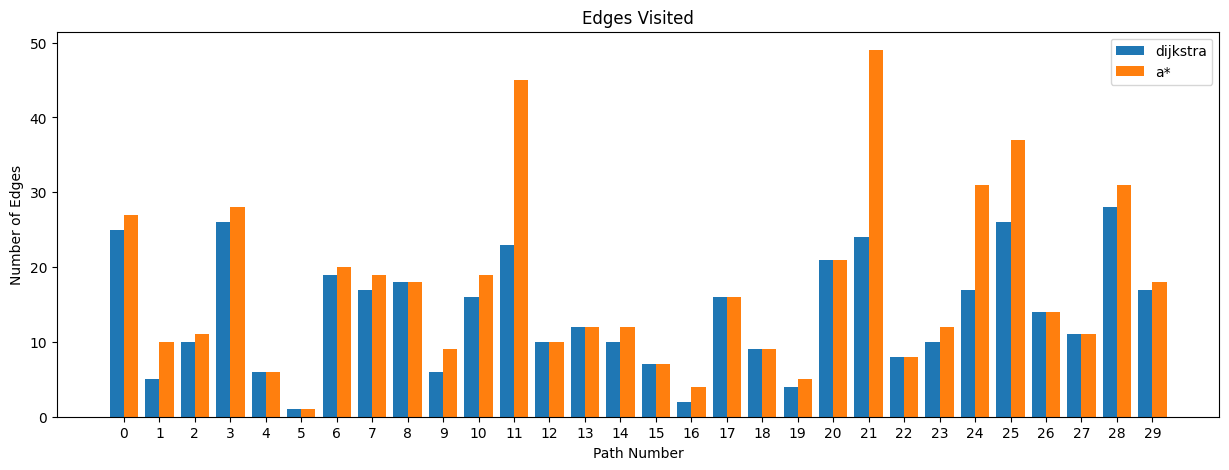

In [6]:
#Comparing number of edges visited
y_dijkstras = [edges_visited_dijkstras[key] for key in nodes_visited_dijkstras]
y_astar = [edges_visited_astar[key] for key in nodes_visited_astar]

plt.rcParams["figure.figsize"] = [15, 5]
plt.bar(x - 0.2, y_dijkstras, 0.4, label = 'dijkstra')
plt.bar(x + 0.2, y_astar, 0.4, label = 'a*')
plt.xticks(x)
plt.title("Edges Visited")
plt.xlabel('Path Number')
plt.ylabel('Number of Edges')
plt.legend()
plt.show()


#### Plotting Dijkstra's vs. A* for Travel Time

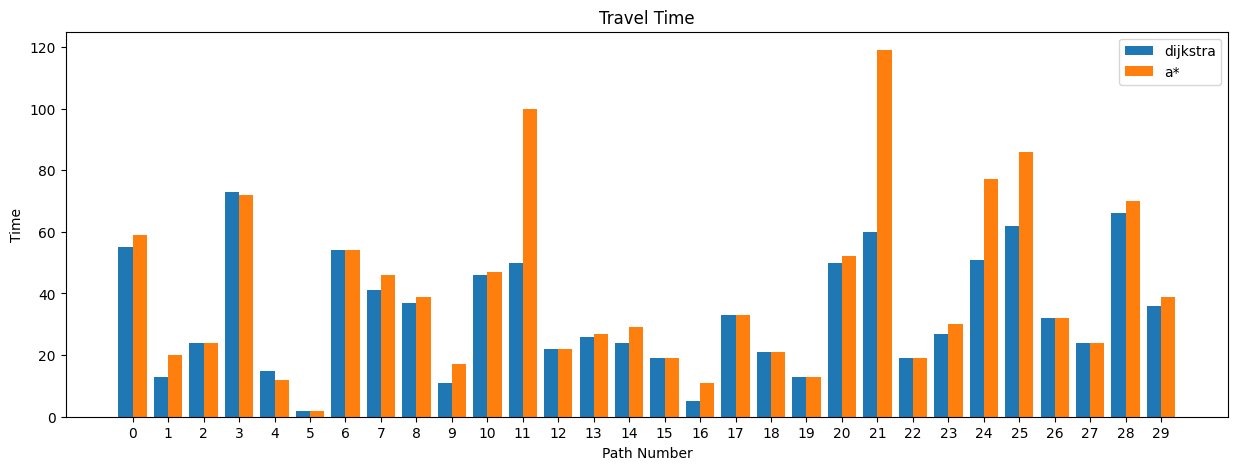

In [7]:
#Comparing travel time
y_dijkstras = [travel_time_dijkstras[key] for key in nodes_visited_dijkstras]
y_astar = [travel_time_astar[key] for key in nodes_visited_astar]
plt.rcParams["figure.figsize"] = [15, 5]
plt.bar(x - 0.2, y_dijkstras, 0.4, label = 'dijkstra')
plt.bar(x + 0.2, y_astar, 0.4, label = 'a*')
plt.xticks(x)
plt.title("Travel Time")
plt.xlabel('Path Number')
plt.ylabel('Time')
plt.legend()
plt.show()

#### Comparing Runtimes

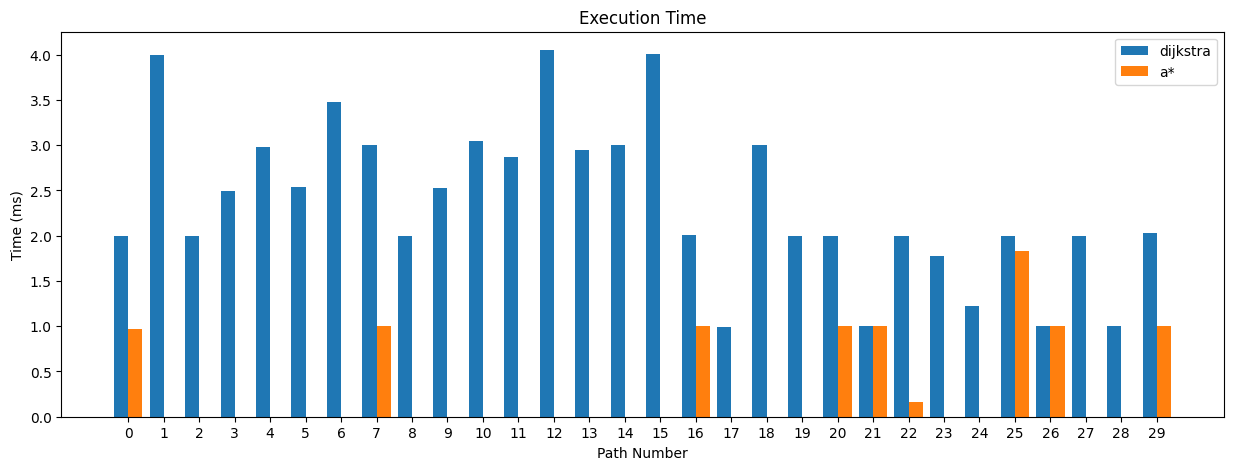

In [8]:
import time

graph = BuildEdgeGraph.build()
dataset = build_dataset(30)

def measure_dijkstras(graph, s1, s2):
    st = time.time()
    dijkstras.call(graph, s1, s2)
    et = time.time()
    exec_time = et - st
    return exec_time * 1000

def measure_astar(graph, s1, s2):
    st = time.time()
    astar.call(graph, s1, s2)
    et = time.time()
    exec_time = et - st
    return exec_time * 1000

x = [dataset[key] for key in dataset]
x = np.arange(len(x))
y_dijkstras = [measure_dijkstras(graph, dataset[key][0], dataset[key][1]) for key in dataset]
y_astar = [measure_astar(graph, dataset[key][0], dataset[key][1]) for key in dataset]
plt.bar(x - 0.2, y_dijkstras, 0.4, label = 'dijkstra')
plt.bar(x + 0.2, y_astar, 0.4, label = 'a*')
plt.xticks(x)
plt.title("Execution Time")
plt.xlabel('Path Number')
plt.ylabel('Time (ms)')
plt.legend()
plt.show()

Week 1 Report
====================

### Work Distibution

Adam Podolak:
+ Modular Design (implementing design patterns and object oriented principles)
+ Implementation of Metrics Extractor
+ Importing the graph, computing the metrics, plotting degree distribution
+ Implementation of Benchmarks
+ Benchmark Analysis 
+ Design Justification
+ UML Diagram

Justin Ho
+ Implementation of graph builder methods and algoirthms
+ Implementation of Dijkstra's algorithm
+ Implementation of A* algorithm
+ Implementation of Subway Patrol Planning

UML Diagram
---------------------
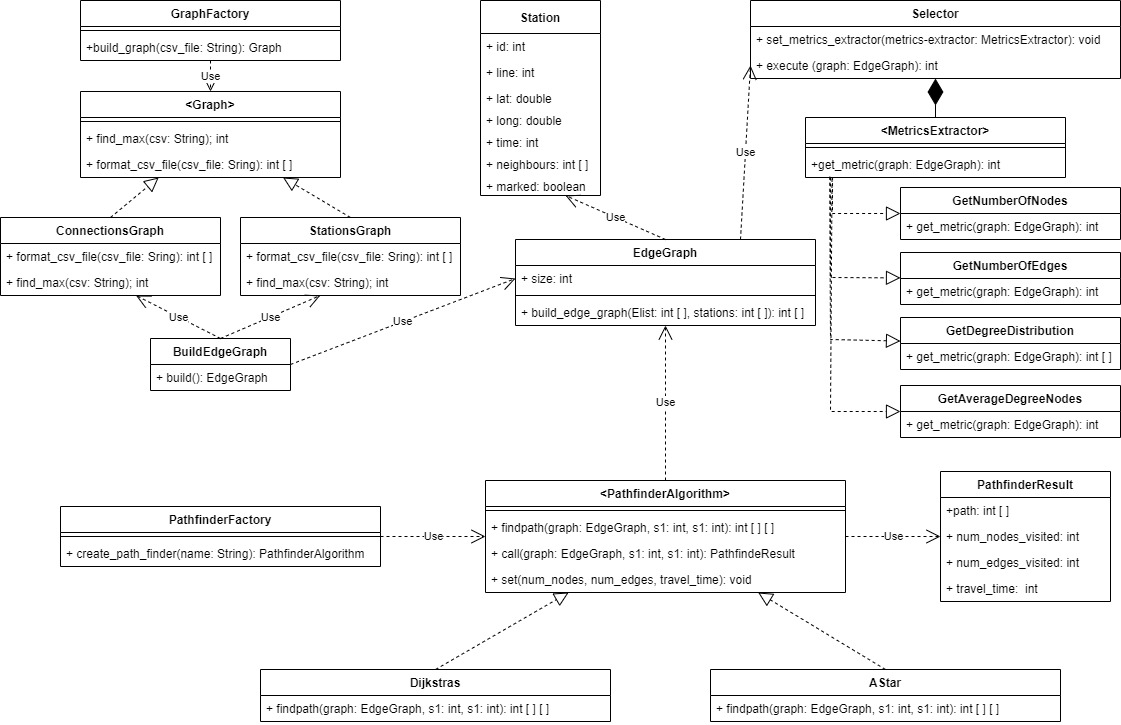

Justification of Design Choices
---------------------

#### Graph Factory

Considering that the csv files for the graphs may change, the implementation of an object oriented graph library that encapsulated the creation of graphs and formatting of csv files was necessary. Our group decided to implement a Factory Pattern in order to encapsulate the creation of graphs.

Our Graph Factory consists of a GraphFactory class that allows us to build a concrete Graph, like a ConnectionsGraph (a graph consisting of all the connections), or a SationsGraph. In this scenario, Factory Pattern is beneficial because it encapsulates object instantiation and object creation. If the format of the csv file were to change, we can easily create a new Graph and implement a new implementation of format_csv_file that is modified to work with the new file format. The concrete Graphs return a list of connections, or a list of the stations. The EdgeGraph class then uses this to form an adjescency matrix which is the final representation of our graph. Tying it all together, the BuildEdgeGraph class acts as a runner class that allows us to instantiate graph factories, create the concrete graph builder/formatter(ConnectionsGraph or StationsGraph), format the csv files, and create the EdgeGraph, all in one class. 

In conclusion, a factory pattern implementation was chosen for the graph library because it allows us to encapsulate object instation and object creation. If the formats of the csv files were to change, the library adheres to open/closed principles, since we would be open to extend by creating new graph formatters, while closed for modification because we wouldn't be modifying existing source code. The factory pattern also adhers to dependency inversion principles which reduces coupling, makes the library more stable, and gives more flexibility at runtime. 

#### Metrics Extractor

For the Metrics Extractor, a strategy pattern was implemented to allow for the addition of more metrics extractors in the future, if new metrics were added and needed to be calculated.The strategy pattern allows us to alter the behaviour of our metrics extractor at runtime, being able to choose which metric we want to extract at any given time. We can simply use the selector class to set and execute metric extraction as we please. This allows for our code to be open for extension, where new metrics extractors can be easily added if new metrics are needed and allows for maximum flexibility at runtime.

#### Pathfinder Factory

For the pathfinding algorithms, a similar factory pattern was implemented to allow for the encapsulation of pathfinding algorithms. The design supports the inclusion of additional pathfinding algorithms in an open/closed way, while allowing for the encapsulation of object instantiation and creation. New pathfinding algorithms can be added at any time without modifying existing source code. The PathfinderFactory and PathfindingAlgorithm classes also support benchmarking with a PathfinderResult that allows us to measure the number of nodes visited, number of edges visited, and travel time for a given path and pathfinding algorithm. Once again, the factory pattern is beneficial in this case because it adheres to open/closed principles, dependency inversion, and allows for more stability and flexibility at runtime.

Benchmark Results
---------------------

The KPIs chosen to benchmark the pathfinding algorithms were the number of nodes visited, the number of edges visited, and travel time. For the context of a subway network graph, these KPIs have logical reasoning. For example, let’s say a traveler would prefer a shorter travel time if it meant they had to change seats multiple times, or vice versa. 

We can first look at the comparison between the A* algorithm and Dijkstra’s implementation when measuring nodes visited. While executing the benchmark and measuring the KPI, a dataset of 30 random paths was used as input. The path consisted of 2 random integers (station numbers) from 1 to 303. The general trend observed from this benchmark was that the A* algorithm visited on average more nodes than Dijkstra’s. Likewise, the same trend holds for the number of edges visited, and travel time. In general, Dijkstra outperforms A* when it comes to our pre-defined KPIs. This is mostly because A* is a heuristic and will essentially make an educated guess as to which path to take. This means that while executing, it may choose the wrong path and must retrace its steps, causing it to visit more nodes and edges. However, when we observe execution time, A* is generally much faster. It should be noted that the bar graph that compares execution time appears to be missing data for A* for certain inputs. These entries were recorded as a time of 0.0, which is most likely due to some environmental errors when running the benchmark. However, for the test inputs that successfully recorded both execution times for Dijkstra and A*, A* is observed to be faster than Dijkstra.

Evidently, solutions to software development problems are not trivial. There will always be trade-offs between one implementation and another. This emphasizes the significance of benchmarking and analysis. Within the scope of the subway network graph system, both Dijkstra and A* pathfinding implementations have benefits and drawbacks. Dijkstra is a more sound, predictable, and efficient pathfinding algorithm, while A* is faster in its execution time, but less efficient in its pathfinding. Choosing the appropriate implementation all depends on the stakeholders of the project and what KPI is more valuable to them. In this scenario, a good approach would be to choose Dijkstra’s, as it is only minimally faster than A*, and because the subway network is very user focused, meaning travelers will want to know which path will guarantee them the least time, least seat changes, etc. 


Adam Podolak Self-Reflection
---------------------

#### Backward

 Similar courses in the past have given me an introduction to software development, and graph algorithms. Intro to Software Development (2AA4) was heavily focused on design patterns, and how to develop software that adheres to the SOLID principles. Likewise, Data Structures and Algorithms taught me how to theoretically apply different algorithms to different problems. However, combining the two concepts of design and algorithm implementation is something new to me. Being able to implement algorithms and design patterns to solve a software development problem is something that I have never done before. 

#### Inward

The work was quite challenging, being faced with many problems and uncertainties. However, overcoming these problems and undergoing a larger-scale software development process to solve a problem that can be considered applicable in the real world was satisfying. The part that I enjoyed the most was implementing a modular design that adhered to SOLID principles. Creating the actual design for the solution and how the code will be structured is very interesting to me because it requires lots of problem-solving, but also some creativity. The part that I disliked the most was benchmarking. It was quite tedious and boring, to say the least, but I can understand the need for it and it was interesting to visualize the results.

#### Outward

The one thing that I particularly want people to notice about my work is the design portion and the attention to detail with respect to software quality. Implementing algorithms is a crucial part of software development, but another important aspect is the quality of your code, its readability, maintainability, and design.

#### Foward

If I had to do this project again, I would take more time to focus on the design of the code, the software quality, the benchmarking, and the analysis as these contribute to a substantial portion of the project’s success. 